pandas:For reading, cleaning, combining, and manipulating tabular data (CSV files).
scikit-learn : For machine learning tasks: training models, splitting data, vectorizing text, evaluating models.
nltk: For text preprocessing: removing stopwords, cleaning text.

In [1]:
!pip install pandas scikit-learn nltk

matplotlib :
-> To create plots and visualizations.
-> In project: Used to visualize confusion matrices and data distributions

seaborn : Imports Seaborn for advanced statistical plots.
-> Makes prettier, easier-to-read plots.
-> Used for: class distribution countplot, heatmaps of confusion matrices.

from sklearn.model_selection import train_test_split: Function to split data into training and test sets.
-> Needed to train your model on one set of data and test it on unseen data for fair evaluation.


from sklearn.feature_extraction.text import TfidfVectorizer: Tool to convert text into numerical vectors using TF-IDF (Term Frequency–Inverse Document Frequency).
-> ML models can’t work with raw text.
-> TF-IDF captures word importance while reducing noise.

from sklearn.linear_model import LogisticRegression : Logistic Regression classifier
-> One of the models you train to classify news as fake or real.
-> Simple, interpretable baseline.

from sklearn.naive_bayes import MultinomialNB: Naive Bayes classifier for discrete features (like word counts or TF-IDF)
-> Works well for text classification.
-> Good benchmark alongside logistic regression.


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score: 
Evaluation tools:
-> classification_report: precision, recall, F1.
-> confusion_matrix: breakdown of predicted vs. true labels.
-> accuracy_score: overall accuracy.
-> To assess how well your models are performing.

import nltk:- Natural Language Toolkit: popular library for NLP.
-> Provides stopword lists and other preprocessing tools.
-> Essential for cleaning your text.

import re : Python’s regular expression module.
Used for pattern matching and text cleaning:
-> Removing digits.
-> Replacing patterns.

import string: Python’s built-in module with string constants.
-> Provides string.punctuation to easily remove all punctuation.

nltk.download('stopwords'): Downloads the English stopwords corpus (if not already available locally)
-> Needed because your cleaning function uses these stopwords.
-> Example stopwords: the, is, in, and.
-> Removing them helps models focus on meaningful words.


from nltk.corpus import stopwords: Imports stopwords from NLTK.
-> Lets you get the set of common English stopwords to remove from text.
-> You’ll use stopwords.words('english') to get the list.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
import re
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fake.csv: Contains news articles labeled as FAKE.
True.csv: Contains news articles labeled as REAL.

In [3]:
fake_df = pd.read_csv("C:/Users/swath/Downloads/News_Classifier_Dataset/Fake.csv")
true_df = pd.read_csv("C:/Users/swath/Downloads/News_Classifier_Dataset/True.csv")

This line displays the first 5 rows of the DataFrame fake_df.
-> When you load a big dataset, you often want to quickly preview what it contains.
-> .head() is a pandas method that shows you the top N rows (default = 5).

In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


They add a new column called label to each DataFrame:
-> For fake_df, every row gets label = 0
-> For true_df, every row gets label = 1

Machine learning models need numerical labels to know which class each example belongs to.
| Dataset | Label |
| ------- | ----- |
| Fake    | 0     |
| True    | 1     |

why ?
-> Supervised learning needs labeled data.
-> Your model can’t learn what “fake” or “real” is without a target label.
By adding this label column:
-> You make it clear which articles are fake (0) and which are real (1).
-> You can combine the datasets into one big labeled dataset for training.

In [8]:
fake_df['label'] = 0
true_df['label'] = 1

Uses pandas.concat() to combine fake_df and true_df vertically (row-wise).
Stores the result in a new DataFrame called df.

->  df.sample(frac=1): Shuffles all the rows randomly.
-> random_state=42: Ensures the shuffling is repeatable every time you run the code.
-> .reset_index(drop=True): Resets the index so it goes from 0 to N again (drops old index).

why?
-> In your original data, all fake articles come first, then all real articles.
-> If you don’t shuffle, the model may learn a biased pattern (e.g., "first half is fake").
Shuffling ensures:
-> Random mix of fake and real samples
-> Balanced learning
-> Fair train-test split later

--> random_state is a seed for the random number generator. 
why?
Without setting random_state, every time you run the code, the shuffle would be different.
But with it set, the shuffle is always the same.
why is this useful in ML ?
Because reproducibility is critical:
-> You want others (or yourself later) to get the same split and same results when rerunning the code.
-> This is essential for experiments, comparisons, and debugging.


In [9]:
df = pd.concat([fake_df, true_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


They clean and prepare your combined dataset df by:

1️. Keeping only the important columns
️2. Removing any rows with missing values

why?
-> Machine learning models cannot handle missing values.
-> You can’t train or predict with empty text.
-> Dropping missing rows cleans the dataset.

In [11]:
df = df[['text', 'label']]
df = df.dropna()

It creates and displays a bar chart showing how many FAKE and REAL news samples you have in your dataset.
-> sns.countplot = Draw a bar chart of fake vs. real counts.
-> plt.title = Add a title to explain what the chart shows.
-> plt.show() = Display the chart on screen.

why?
-> EDA (Exploratory Data Analysis):
Always check data balance before training.
A big imbalance can hurt model performance.
-> Helps you decide:
Do you need to balance classes? (e.g., oversample or undersample)
Are there enough examples of each type?

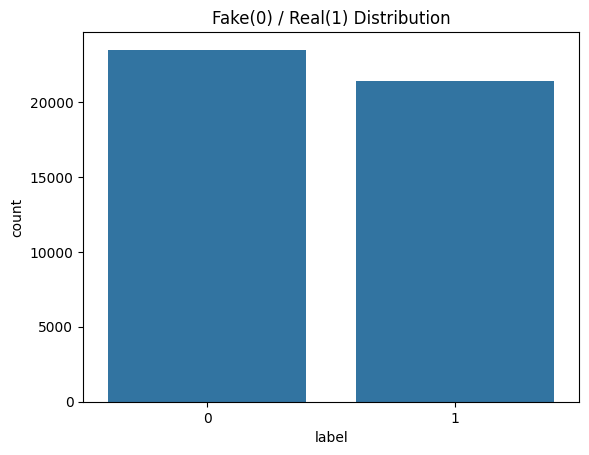

In [12]:
sns.countplot(x='label', data=df)
plt.title('Fake(0) / Real(1) Distribution')
plt.show()

-> What it does:
Downloads a list of English stopwords (like: the, is, and, in, on, etc.) from NLTK, and stores them as a Python set.
-> Why use a set?
Sets are faster than lists for checking if a word exists.

-> Why remove stopwords?
They are very common words that:
Don't add meaning
Appear in all texts
Can reduce model accuracy if left in

Example:
Original sentence: "This is a fake news article"
After removing stopwords: "fake news article"

def clean_text(text):This defines a function to clean and prepare text before feeding it to the model.

a. text = text.lower()
-> Converts all characters to lowercase
Why?
To treat words like "News" and "news" the same.

b. text = re.sub(r'\d+', '', text)
-> Uses a regular expression to remove all numbers
Why?
Numbers like “2021” or “123” are usually not helpful in classifying fake vs real news.

c. text = text.translate(str.maketrans('', '', string.punctuation))
-> Removes all punctuation (like .,?!:; etc.)
Why?
Punctuation doesn’t help the model and adds noise.

d. text = text.strip()
-> Removes any leading/trailing spaces
-> Clean and tidy input

e. tokens = text.split()
-> Splits the text into a list of words (tokens)
Example: "fake news article" → ['fake', 'news', 'article']

f. tokens = [w for w in tokens if w not in stop_words]
-> Removes all stopwords from the list
-> Only keeps meaningful words

g. return ' '.join(tokens)
-> Joins the cleaned words back into a single string
Example: ['fake', 'news', 'article'] → "fake news article"

Original i/p:- "This is a Fake NEWS article!!! Published in 2021."
after cleaning : "fake news article published"


In [13]:
stop_words = set(stopwords.words('english'))

def clean_text(text): 
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)


It creates a new column in your DataFrame called clean_text.
It applies your clean_text() function to every row in the existing text column.

-> .apply() is a pandas method that lets you apply a function to each value in a Series (column).
It’s like saying:
“For every article’s text in this column, clean it using my clean_text function.”

Imagine df['text'] has: "Breaking NEWS!!! This is a FAKE article, 2021."
 After applying clean_text(): "breaking fake article"

clean_text function removes : Raw, messy text with:Mixed case, Numbers, Punctuation, Stopwords

why ?
ML model will train on the clean_text column.
It improves:
-> Model accuracy
-> Model speed
-> Feature quality

In [14]:
df['clean_text'] = df['text'].apply(clean_text)

In [15]:
df[['text', 'clean_text']].head()

,text,clean_text
0,"21st Century Wire says Ben Stein, reputable pr...",st century wire says ben stein reputable profe...
1,WASHINGTON (Reuters) - U.S. President Donald T...,washington reuters us president donald trump r...
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,reuters puerto rico governor ricardo rossello ...
3,"On Monday, Donald Trump once again embarrassed...",monday donald trump embarrassed country accide...
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",glasgow scotland reuters us presidential candi...


X = df['clean_text'] : Stores the input features (i.e., cleaned news article text) in variable X. (This is the data the model will learn from.) 

y = df['label'] : Stores the target values (0 for FAKE, 1 for REAL) in variable y.(This is what the model will try to predict based on the text.)

train_test_split(...)
This function splits your dataset into:
-> A training set: used to train the model
->  A test set: used to evaluate the model on unseen data

Let’s break down the arguments: X, y (These are your full input and output datasets.) 

-> test_size=0.2
20% of the data will go into the test set,
80% will be used for training.

-> random_state=42: Ensures the split is the same every time you run it.

-> stratify=y (This ensures that the class distribution (fake vs real) is preserved in both training and testing sets.)
For example:
If your full dataset has 60% real and 40% fake,
then both training and test sets will also have the same proportion.
Without stratify, you might accidentally end up with mostly one class in either set — which can ruin your model's performance.

| Variable  | Contains                     |
| --------- | ---------------------------- |
| `X_train` | Cleaned text for training    |
| `X_test`  | Cleaned text for testing     |
| `y_train` | Labels (0 or 1) for training |
| `y_test`  | Labels (0 or 1) for testing  |


-> X = input text
-> y = labels
-> train_test_split() = divides data into training and testing sets
-> stratify=y = keeps fake/real ratio balanced in both sets
-> random_state=42 = ensures the split is the same every time

In [16]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

1️. tfidf = TfidfVectorizer(max_features=5000)

What is TfidfVectorizer?
-> A tool from scikit-learn that converts text into numerical features.
-> TF-IDF = Term Frequency - Inverse Document Frequency.

What does TF-IDF do?
-> Counts how important a word is in a document relative to the entire dataset.
-> Common words in many documents get lower weight.
-> Rare but important words get higher weight.

Example: 
"the", "is" = very common = low score.
"vaccination", "hoax" = more meaningful = higher score.

Why max_features=5000?
-> Limits the vocabulary to the top 5,000 most frequent words.
-> Controls memory use and model complexity.
-> Keeps only the most informative words.
Without it, vectorizer might try to use 100,000+ words, which is slower and noisier.

Result:
You've created a TF-IDF vectorizer ready to turn text into numbers.


2️. X_train_tfidf = tfidf.fit_transform(X_train)
What it does:
-> Fits the vectorizer on the training data:
-> Learns which words exist.
-> Computes their IDF (importance) scores.
-> Transforms the training text into vectors.

Output:
X_train_tfidf is a sparse matrix (rows = articles, columns = words).

why ?
-> ML models can’t work directly on text.
-> They need numeric features.

3️. X_test_tfidf = tfidf.transform(X_test)
What it does:
-> Uses the same vectorizer learned from training data.
-> Transforms test data into the same 5,000-dimensional space.

Important:
-> Ensures test data is vectorized the same way.
-> Prevents data leakage (test info leaking into training).


4️. X_train_tfidf.shape
What it does:
Shows the dimensions of the transformed training data.

Example output: (35918, 5000)
-> 35918 = number of training samples
-> 5,000 = number of features (words)

Why?
Confirms the transformation worked.
Checks the size of your feature matrix.


| Method               | What it does                                        | Used on           |
| -------------------- | --------------------------------------------------- | ----------------- |
| fit\_transform() | Learns from data AND transforms it              | Training data |
| transform()      | Just transforms, using previously learned rules | Test data    |



Explanation (with simple analogy!)
Imagine your text data is like fruit baskets:

🧺 Training basket:
apples, oranges, bananas, pineapples

🧺 Test basket:
apples, oranges, lemons

fit_transform()
Used on training data only.
-> Fit part: Learn which fruits exist, how frequent they are, and their importance.
-> Vocabulary: apples, oranges, bananas, pineapples
-> Transform part: Convert training basket into numeric vectors based on that learned mapping.

Why?
This is where the vectorizer learns the important words and their IDF scores.


transform()
Used on test data only.
-> No learning here!
-> Just applies the same rules learned from training.
-> Converts test basket to numeric vectors, using training vocabulary only.

Example:
-> Lemons is unknown (wasn’t in training)—so it’s ignored or given 0 weight.
-> Only apples and oranges are transformed.

Real-world Analogy

🎓 Think of fit() as studying for the exam:
You learn vocabulary, concepts, rules.

✏️ Think of transform() as taking the exam:
You apply what you studied.
You don’t get to learn new things during the test!

Data Leakage: 
Data leakage happens when information that should not be available at training time is used to train the model.



In [17]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf.shape

(35918, 5000)

Creates a logistic regression model — ready to learn from the data.
Used for binary classification (fake = 0, real = 1).

Trains the model using the TF-IDF features and labels.
It learns which word patterns indicate fake or real news.

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

Creates a Multinomial Naive Bayes model — commonly used for text classification.
It’s good at handling word counts or TF-IDF features.

Trains the Naive Bayes model on your TF-IDF features and labels.
It learns how word patterns relate to fake or real news.                                                     

In [20]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

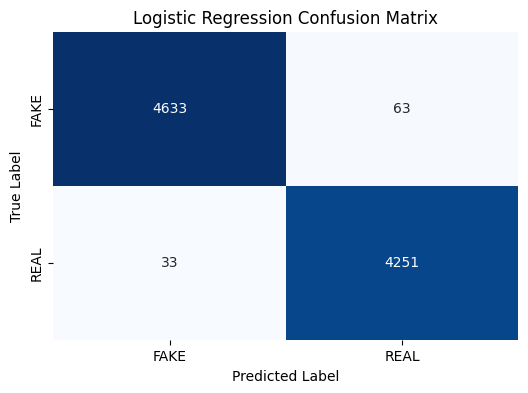

In [23]:
cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [24]:
lr_preds = lr_model.predict(X_test_tfidf)

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [25]:
nb_preds = nb_model.predict(X_test_tfidf)

print("Naive Bayes Results:")
print(classification_report(y_test, nb_preds))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4696
           1       0.94      0.96      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



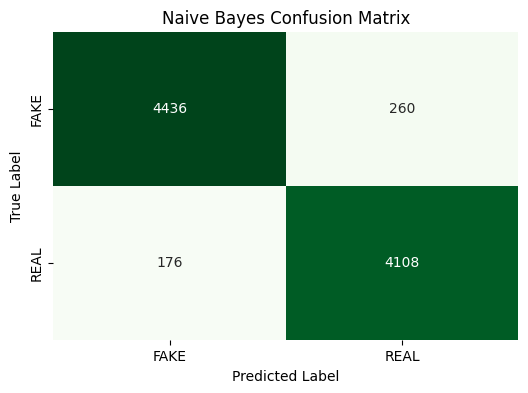

In [27]:
cm_nb = confusion_matrix(y_test, nb_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


In [ ]:
Imports the joblib library.
Used for saving and loading machine learning models and objects.

Saves your trained Logistic Regression model to a file named 'logistic_model.pkl'.
You can reuse it later without retraining.

Saves your trained TF-IDF Vectorizer to a file named 'tfidf_vectorizer.pkl'.
This preserves the same vocabulary and weights for future use.

In [31]:
import joblib

joblib.dump(lr_model, 'logistic_model.pkl') # trained Classifier
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')  # trained text converter 

['tfidf_vectorizer.pkl']

1️⃣ Importing the tools
What does this do?
streamlit — Lets you build the web app interface.
joblib — Used to load your saved model and vectorizer.
re, string — Help clean and process text (remove numbers, punctuation).
nltk — Natural Language Toolkit, used for stopwords (common words to remove).
nltk.download('stopwords') — Downloads English stopword list.
from nltk.corpus import stopwords — Imports the actual list of stopwords.

Why?
You need these tools to:
-> Build the app
-> Load your trained files
-> Clean user text properly before prediction

2️⃣ Load your trained model and vectorizer
-> Loads the trained Logistic Regression model and the TF-IDF vectorizer you saved earlier.
Why?
So you don’t retrain every time—you just reuse the model that’s ready to predict. 

3️⃣ Set up stopwords
-> Loads a list of common English words (like “the”, “is”, “and”) to remove from input text.
Why?
These words don't help determine if news is fake or real—they’re just noise.  

4️⃣ Create the App Title
✅ Sets the big title at the top of your web app page.
✅ Why?
To tell users what your app does!

5️⃣ Text input box for the user
✅ Adds a big text box where the user can paste or type their news article.
✅ Why?
This is the input your model will analyze.


6️⃣ Define a text-cleaning function
✅ This function cleans the user’s text so it matches the format used in training.

✅ Step by step, it:
-> Makes text lowercase
-> Removes numbers
-> Removes punctuation
-> Removes extra spaces
-> Removes stopwords

✅ Why?
Your model was trained on cleaned text. You must clean new text the same way before predicting.

7️⃣ Add a "Classify" button
✅ Adds a button that users can click to run the prediction.
✅ Why?
So the prediction only runs when they’re ready.

8️⃣ When button is clicked, do this:
✅ Step by step:
1️⃣ Clean the user's text with your clean_text() function.
2️⃣ Vectorize it with the same TF-IDF vectorizer you trained.
3️⃣ Predict if it’s fake or real using your model.

9️⃣ Show the prediction result
✅ Turns the model’s numeric prediction (0 or 1) into words:
1 → REAL
0 → FAKE
✅ Then displays the result on the web page in big text.


